In [92]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png")

# House Prices - Advanced Regression Techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we are going to predict the final price of each home. Let us get sterted!

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

%matplotlib inline

In [94]:
pd.set_option('display.max_columns', None)

## 1. General information

In [95]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [96]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (1460, 81)
Test shape: (1459, 80)


In [98]:
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

In [99]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Exploratory Data Analysis

### 2.1 Target value analysis

Text(0.5, 1.0, 'SalePrice distribution')

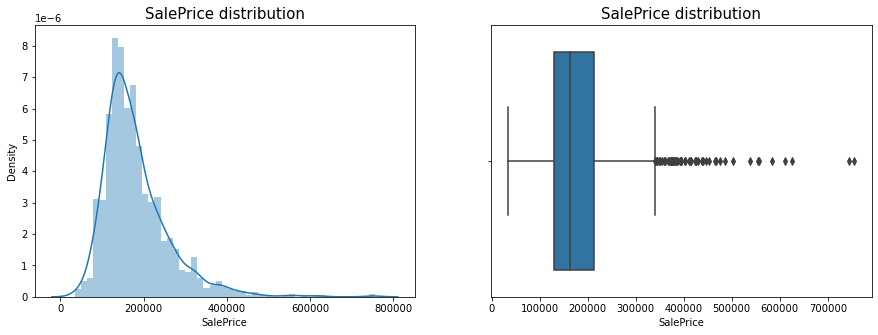

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train['SalePrice'])
plt.title('SalePrice distribution',fontsize=15)

plt.subplot(122)
sns.boxplot(train['SalePrice'])
plt.title('SalePrice distribution',fontsize=15)

On the plots we can see, there is a long tail to the right. Log function can handle with such tail. 

Text(0.5, 1.0, 'Log(SalePrice) distribution')

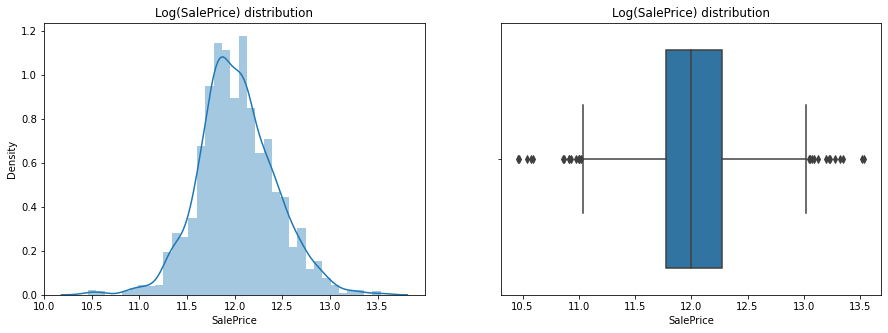

In [101]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(np.log(train['SalePrice']))
plt.title('Log(SalePrice) distribution')

plt.subplot(122)
sns.boxplot(np.log(train['SalePrice']))
plt.title('Log(SalePrice) distribution')

The distribution looks like normal, therefore we will work with log(SalePrice) target function

In [102]:
np.log(train['SalePrice']).describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [103]:
train['Log(SalePrice)'] = np.log(train['SalePrice'])
train.drop('SalePrice', axis=1, inplace=True)

In [104]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Log(SalePrice)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


### 2.1 Data types

In [105]:
train.dtypes.value_counts()

object     43
int64      33
float64     4
dtype: int64

### 2.3 Missing values

Persentage of missing values

In [106]:
train.isna().sum()[train.isna().sum()>0]/train.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Features, that have > 70% missing values, will be dropped

In [107]:
train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

#### 2.3.1 Categorial values

In [108]:
obj = train.dtypes[train.dtypes=='object'].index
for i in obj:
    print(i, train[i].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

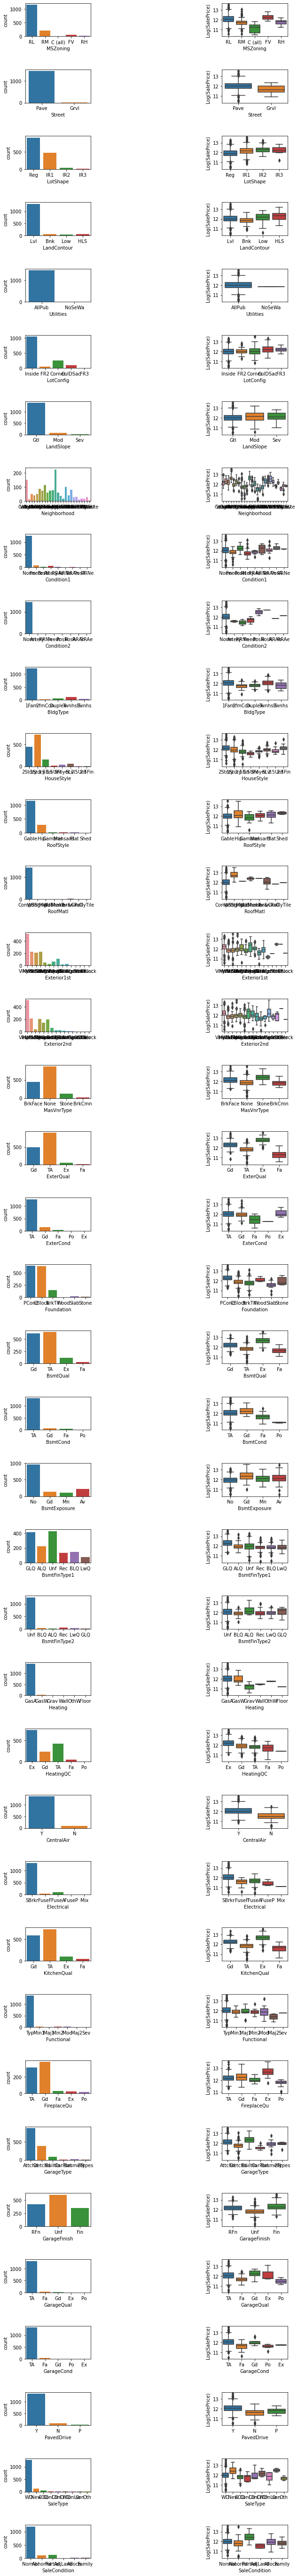

In [109]:
fig, ax = plt.subplots(len(obj), 2, figsize=(10,100))
plt.subplots_adjust(hspace=1, wspace = 2)

for i, col in enumerate(obj):
    sns.countplot(x=col, data=train, ax=ax[i, 0])

for i, col in enumerate(obj):
    sns.boxplot(x=col, y='Log(SalePrice)', data=train, ax=ax[i, 1])

What can we say looking on the charts:

1) the most of the charts have disbalance of classes. 

2) distribution of classes related to the target feature is not significant

3) In these features is this distribution more or less significant: 'MSZoning', 'LotShape','Street','Neighborhood', 'BidgType',
                       'MasVnrType', 'Exterior1st','Exterior2nd', 'HouseStyle', 'RoofStyle',
                       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
                           'BsmtFinType1', 'HeatingQC', 'CentralAir', 'GarageType', 'GarageFinish','GarageQual','GarageCond', 'KitchenQual','FireplaceQu'

Let's up fill missing values in these features with mode value, other features will be dropped.

In [110]:
sign_categ_features = ['MSZoning', 'LotShape', 'Street','Neighborhood','BidgType',\
                       'MasVnrType','Exterior1st','Exterior2nd', 'HouseStyle','RoofStyle',\
                       'ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',\
                       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'GarageType', 'GarageFinish','GarageQual','GarageCond',\
                       'KitchenQual','FireplaceQu']
for col in obj:
    if col in sign_categ_features:
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train.drop(col, axis=1, inplace=True)

for col in obj:
    if col in sign_categ_features:
        test[col] = test[col].fillna(test[col].mode()[0])
    else:
        test.drop(col, axis=1, inplace=True)

In [111]:
train.isna().sum()[train.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

#### 2.3.2 Values with float type

In [112]:
train.select_dtypes(include='float64').head()

,LotFrontage,MasVnrArea,GarageYrBlt,Log(SalePrice)
Id,,,,
1,65.0,196.0,2003.0,12.247694
2,80.0,0.0,1976.0,12.109011
3,68.0,162.0,2001.0,12.317167
4,60.0,0.0,1998.0,11.849398
5,84.0,350.0,2000.0,12.429216


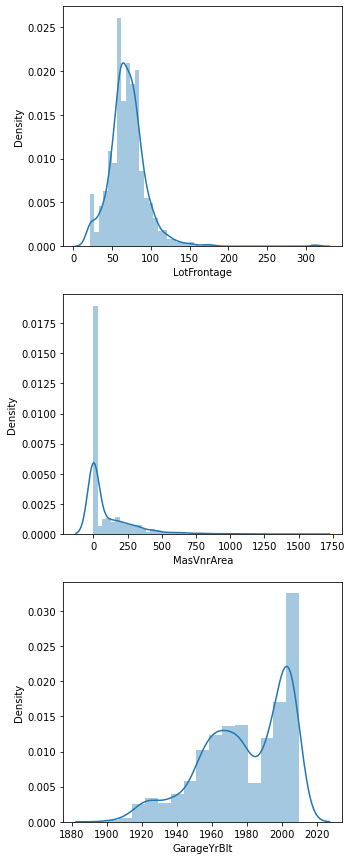

In [113]:
float_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
for i, feature in enumerate(float_features):
    sns.distplot(train[feature], ax=ax[i])

GarageYrBlt is actually a year and cannot be float value. For LotFrontage we apply log function and fill missing values with mean value. MasVnrArea's and GarageYrBlt's missing values we fill with its mode

In [114]:
train['Log(LotFrontage)'] = np.log(train['LotFrontage'])
train['Log(LotFrontage)'] = train['Log(LotFrontage)'].fillna(np.mean(train['Log(LotFrontage)']))

test['Log(LotFrontage)'] = np.log(test['LotFrontage'])
test['Log(LotFrontage)'] = test['Log(LotFrontage)'].fillna(np.mean(test['Log(LotFrontage)']))

train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])

train.drop('LotFrontage', axis=1, inplace=True)
test.drop('LotFrontage', axis=1, inplace=True)

#### 2.3.2 Values with int type

In the train dataset there are no missing values in features with integer type. There are only in test data. Therefore let us visualize distributions of these features and and fill missing values in test data.

In [115]:
test.isna().sum()[test.isna().sum()>0]

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
GarageArea      1
dtype: int64

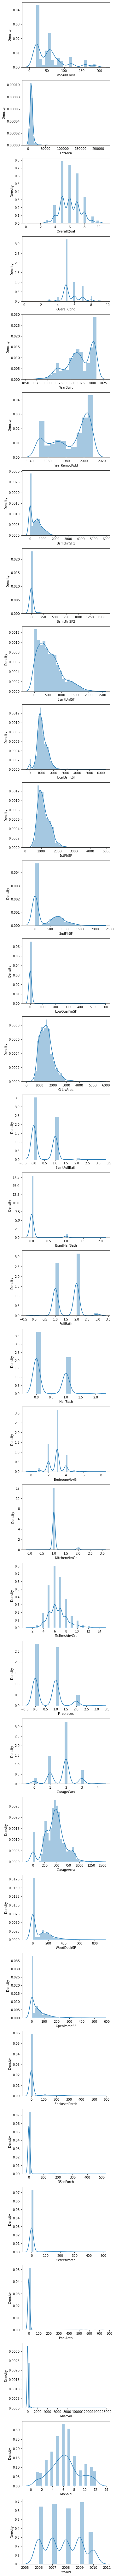

In [116]:
int_features = train.select_dtypes(include='int64').columns
fig, ax = plt.subplots(len(int_features), 1, figsize=(5,150))
for i, col in enumerate(int_features):
    sns.distplot(train[col], ax=ax[i])

In [117]:
for col in test.isna().sum()[test.isna().sum()>0].index:
    test[col] = test[col].fillna(0)

## 3. Data Preprocessing 

### 3.1 Feature filtering

Let us check the correlation between numerical features and target feature

In [118]:
numerical_features = train.select_dtypes(include=['float64', 'int64']).columns

In [119]:
numerical_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Log(SalePrice)', 'Log(LotFrontage)'],
      dtype='object')

In [120]:
for feature in numerical_features:
    corr = np.corrcoef(train[feature], train['Log(SalePrice)'])[1,0]
    print(f'{feature}: {corr}')

MSSubClass: -0.07395901733239696
LotArea: 0.2573198923527388
OverallQual: 0.8171844179216832
OverallCond: -0.03686798773028407
YearBuilt: 0.586570240384227
YearRemodAdd: 0.5656078325911795
MasVnrArea: 0.4267751318363651
BsmtFinSF1: 0.37202307356708825
BsmtFinSF2: 0.004832410532046655
BsmtUnfSF: 0.22198505352520975
TotalBsmtSF: 0.6121339753697864
1stFlrSF: 0.596981045034374
2ndFlrSF: 0.3192999843472048
LowQualFinSF: -0.037962803137426976
GrLivArea: 0.7009266525441299
BsmtFullBath: 0.2362241088243499
BsmtHalfBath: -0.0051490940532397545
FullBath: 0.5947705420075323
HalfBath: 0.31398224991514845
BedroomAbvGr: 0.20904368212692032
KitchenAbvGr: -0.14754808847658163
TotRmsAbvGrd: 0.5344222037231254
Fireplaces: 0.4894494275984855
GarageYrBlt: 0.40600389398582304
GarageCars: 0.6806248074360467
GarageArea: 0.6508875559020073
WoodDeckSF: 0.3341350739575127
OpenPorchSF: 0.3210529720197675
EnclosedPorch: -0.1490502814276764
3SsnPorch: 0.05490022646762043
ScreenPorch: 0.12120760489686364
PoolArea: 

We drop the features, which weak correlate with a target feature (|Pearson correlation coefficient| < 0.3)

In [121]:
drop_features = []
for feature in numerical_features:
    corr = np.corrcoef(train[feature], train['Log(SalePrice)'])[1,0]
    if abs(corr) < 0.3:
        drop_features.append(feature)

In [122]:
train.drop(drop_features, axis=1, inplace=True)
test.drop(drop_features, axis=1, inplace=True)

Let us look, how correlate all features with each other. In order to avoid multicollinearity we have to check, which features are much correlated, and drop them

<AxesSubplot:>

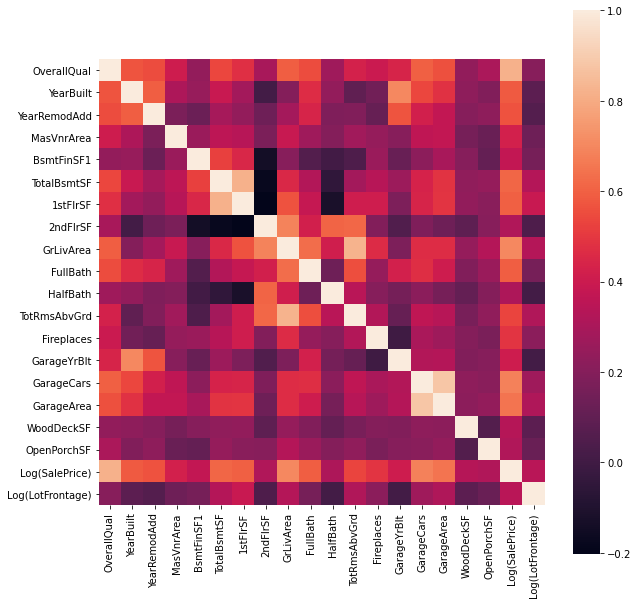

In [123]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), square=True)

TotalBsmtSF and 1stFlrSF are highly correlated. Let's up drop TotalBsmtSF

GarageCars and GarageArea are highly correlated too. Let' drop GarageCars

In [124]:
train.drop(['TotalBsmtSF', 'GarageCars'], axis=1, inplace=True)
test.drop(['TotalBsmtSF', 'GarageCars'], axis=1, inplace=True)

### 3.2 Categorical data encoding

In this section we are going to encoding our categorical data

In [125]:
train_encoded = pd.get_dummies(train)
test_encoded = pd.get_dummies(test)

In [126]:
print(train_encoded.shape)
print(test_encoded.shape)

(1460, 167)
(1459, 161)


We can see, that the number of columns in training and testing data is not the same. It happend, because

In [127]:
for i in train_encoded.columns:
    if i not in test_encoded.columns and i != 'Log(SalePrice)':
        train_encoded.drop(i, axis=1, inplace=True)

### 3.3 Feature scaling

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
X_train = train_encoded.drop('Log(SalePrice)', axis=1)
y_train = train_encoded['Log(SalePrice)']

In [130]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_testing_data = pd.DataFrame(scaler.fit_transform(test_encoded), columns=test_encoded.columns, index=test_encoded.index)

In [131]:
X_train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,Log(LotFrontage),MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.666667,0.949275,0.883333,0.12250,0.125089,0.119780,0.413559,0.259231,0.666667,0.5,0.500000,0.000000,0.936364,0.386460,0.000000,0.111517,0.418208,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.555556,0.753623,0.433333,0.00000,0.173281,0.212942,0.000000,0.174830,0.666667,0.0,0.333333,0.333333,0.690909,0.324401,0.347725,0.000000,0.495064,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

## 4. Modeling

In [132]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error

In the section we are going to build models Ridge and Lasso regression. 

### 4.1 Ridge Regression

In [133]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [134]:
def calc_score_msle(model, X, y):
    score = {}
    msle = {}
    for a in alphas:
        ridge = model(a)
        score[a] = np.mean(cross_val_score(ridge, X, y, cv=5))
        msle[a] = np.mean(-cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_log_error'))
    return score, msle

In [135]:
score_ridge, msle_ridge = calc_score_msle(Ridge, X_train, y_train)

In [136]:
print(f'The best R^2 score is reached by Ridge regularization parameter alpha = {max(score_ridge, key=score_ridge.get)}')
print(f'The best MSLE  is reached by Ridge regularization parameter alpha = {min(msle_ridge, key=msle_ridge.get)}')

The best R^2 score is reached by Ridge regularization parameter alpha = 10
The best MSLE  is reached by Ridge regularization parameter alpha = 10


Let us build a Ridge regression model with regularization parameter alpha = 1

In [137]:
lr = Ridge(alpha=10)
lr.fit(X_train, y_train)
print(f'RMSLE = {np.sqrt(mean_squared_log_error(y_train, lr.predict(X_train)))}')
y_pred = lr.predict(X_testing_data)

RMSLE = 0.010306779711823498


In [138]:
output_ridge = pd.DataFrame({'Id': test.index, 'SalePrice': np.exp(y_pred)})
output_ridge.to_csv('Prediction_SalePrice_Ridge.csv', index=False)

### 4.2 Lasso Regression

In [139]:
score_lasso, msle_lasso = calc_score_msle(Lasso, X_train, y_train)
print(f'The best R^2 score is reached by Ridge regularization parameter alpha = {max(score_lasso, key=score_lasso.get)}')
print(f'The best MSLE  is reached by Ridge regularization parameter alpha = {min(msle_lasso, key=msle_lasso.get)}')

The best R^2 score is reached by Ridge regularization parameter alpha = 0.001
The best MSLE  is reached by Ridge regularization parameter alpha = 0.001


In [140]:
lr = Lasso(alpha=0.001)
lr.fit(X_train, y_train)
print(f'RMSLE = {np.sqrt(mean_squared_log_error(y_train, lr.predict(X_train)))}')
y_pred = lr.predict(X_testing_data)

RMSLE = 0.010499708992521959


In [141]:
output_lasso = pd.DataFrame({'Id': test.index, 'SalePrice': np.exp(y_pred)})
output_lasso.to_csv('Prediction_SalePrice_Lasso.csv', index=False)

### 4.3 Random Forest

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

We need to choose the best parameters for trees of the forest. I used GridSearchCV and I needed for that some time, therefore I didn't include this part at the notebook. 

In [143]:
# parameters = {'max_depth':range(30, 51, 5), 'min_samples_split':range(1,4), 'min_samples_leaf':range(1,4)}
# rfr = RandomForestRegressor(random_state=0)
# regr = GridSearchCV(rfr, parameters, n_jobs=-1, cv=10)
# regr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(30, 51, 5),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 4)})

In [144]:
regr.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [145]:
regressor = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=2)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_testing_data)

In [146]:
print(f'RMSLE = {np.sqrt(mean_squared_log_error(y_train, regressor.predict(X_train)))}')

RMSLE = 0.005208369332872809


In [147]:
output_random_forest = pd.DataFrame({'Id': test.index, 'SalePrice': np.exp(y_predict)})
output_random_forest.to_csv('Prediction_SalePrice_Random_Forest.csv', index=False)

Though RMSLE is on trainig data at Ridge and Lasso regression so low, on the testing data RMSLE is about 0.15, that says about overfitting of models. RMSLE at Random Forest is lower on the training data than at Ridge and Lasso, but at the testing data it predicts worse. 